In [164]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st 
import numpy as np

In [ ]:
#Observations
#1. Weight had a significant inpact on tumor size in the Capomulin drug regimen. The higher the weight the bigger the tumor. 
#2. Timepoint also had a major inpact on the tumor size in the Capomulin drug regimen. As the timepoint grew the tumor size grew as well. 
#3. The number of mice per drug regimen was around the same number so I would call this data significant data and that you could make a good judgement off of which treatment would produce the best result.  

In [49]:
mouse_metadata = pd.read_csv("Data/Mouse_metadata.csv")
study_results = pd.read_csv("Data/Study_results.csv")

In [50]:
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [51]:
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [52]:
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [53]:
count_mouse_id = merged_df["Mouse ID"].count()
count_mouse_id

1893

In [54]:
duplicate_mouse_ids = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

duplicate_mouse_data = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicate_mouse_data

clean_study_data_complete = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [55]:
clean_study_data_complete['Mouse ID'].count()

1880

In [56]:
mean = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dev = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, "SEM": sem})
summary_df

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [57]:
#x_axis = clean_study_data_complete["Drug Regimen"].unique()
#y_axis = clean_study_data_complete["Mouse ID"].count()

#plt.figure(figsize=(20,3))
#plt.bar(x_axis, y_axis, color='g', alpha=0.5, align="center")
#plt.xticks(x_axis, rotation="45")

#plt.show()
#plt.tight_layout()

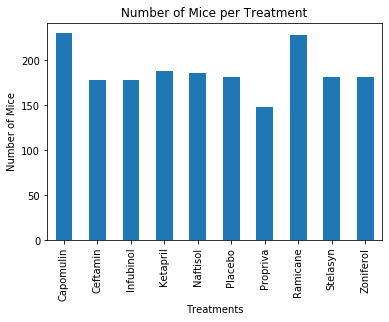

<Figure size 432x288 with 0 Axes>

In [58]:

treatments = clean_study_data_complete.groupby('Drug Regimen')


treatments_mice_total = treatments['Mouse ID'].count()


treatment_chart = treatments_mice_total.plot(kind="bar", title="Number of Mice per Treatment")
treatment_chart.set_xlabel("Treatments")
treatment_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

In [59]:
treatments_matplot = clean_study_data_complete["Drug Regimen"].unique()
treatments_matplot

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [60]:
treatment_count = (clean_study_data_complete.groupby(["Drug Regimen"])["Mouse ID"].count())
treatment_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<BarContainer object of 10 artists>

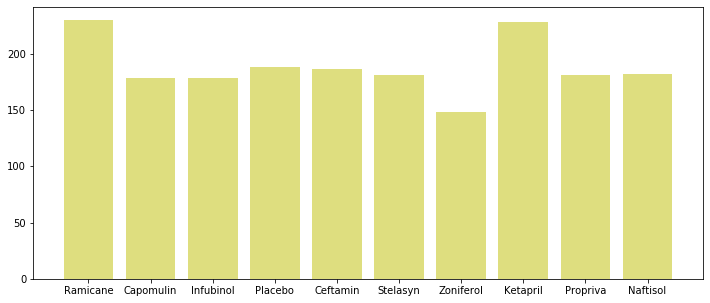

In [74]:
x_axis = treatments_matplot

plt.figure(figsize=(12,5))
plt.bar(x_axis, treatment_count, color='y',alpha=0.5, align='center')



In [75]:
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

In [76]:
clean_study_data_complete.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [93]:
gender_df = pd.DataFrame(clean_study_data_complete.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

Sex  Count  Drug Regimen  Age_months  Weight (g)  Timepoint  \
0  Female    922           922         922         922        922   
1    Male    958           958         958         958        958   

   Tumor Volume (mm3)  Metastatic Sites  
0                 922               922  
1                 958               958

<Figure size 720x432 with 0 Axes>

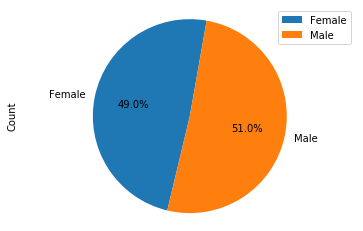

In [102]:
plt.figure(figsize=(10,6))
gender_df.plot(kind='pie', y='Count', autopct="%1.1f%%", shadow=False, startangle=80, labels=gender_df['Sex'])
plt.axis("equal")
plt.show()



In [103]:
gender_count = (clean_study_data_complete.groupby(["Sex"])["Mouse ID"].count())
gender_count

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

(-1.187075692956477,
 1.109124456344466,
 -1.1892878343980988,
 1.1116395376706474)

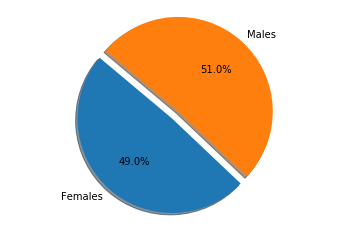

In [104]:
labels = ["Females","Males"]

explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

In [108]:
clean_study_data_complete.max()

Mouse ID                   z969
Drug Regimen          Zoniferol
Sex                        Male
Age_months                   24
Weight (g)                   30
Timepoint                    45
Tumor Volume (mm3)       78.567
Metastatic Sites              4
dtype: object

In [111]:
final_volume_df = clean_study_data_complete.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
timepoint_max_df = final_volume_df.loc[final_volume_df["Timepoint"] == 45]
timepoint_max_df.head().reset_index()

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0    309     b128    Capomulin  Female           9          22         45   
1    299     b742    Capomulin    Male           7          21         45   
2    244     g288    Capomulin    Male           3          19         45   
3    360     g316    Capomulin  Female          22          22         45   
4    440     i557    Capomulin  Female           1          24         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           38.982878                 2  
1           38.939633                 0  
2           37.074024                 1  
3           40.159220                 2  
4           47.685963                 1

In [112]:
capomulin_df = timepoint_max_df[timepoint_max_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_df.head().reset_index()

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0    309     b128    Capomulin  Female           9          22         45   
1    299     b742    Capomulin    Male           7          21         45   
2    244     g288    Capomulin    Male           3          19         45   
3    360     g316    Capomulin  Female          22          22         45   
4    440     i557    Capomulin  Female           1          24         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           38.982878                 2  
1           38.939633                 0  
2           37.074024                 1  
3           40.159220                 2  
4           47.685963                 1

In [114]:
capomulin_list = capomulin_df.sort_values(['Tumor Volume (mm3)'],ascending=True).reset_index()
capomulin_list = capomulin_list["Tumor Volume (mm3)"]
capomulin_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [116]:
quartiles = capomulin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


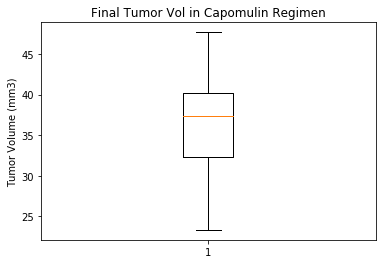

In [117]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Vol in Capomulin Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_list)
plt.show()

In [118]:
ramicane_df = timepoint_max_df[timepoint_max_df['Drug Regimen'].isin(['Ramicane'])]
ramicane_df.head().reset_index()

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0    327     a411     Ramicane    Male           3          22         45   
1    430     a444     Ramicane  Female          10          25         45   
2    214     a520     Ramicane    Male          13          21         45   
3    174     a644     Ramicane  Female           7          17         45   
4    154     c758     Ramicane    Male           9          17         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           38.407618                 1  
1           43.047543                 0  
2           38.810366                 1  
3           32.978522                 1  
4           33.397653                 1

In [119]:
ramicane_list = ramicane_df.sort_values(['Tumor Volume (mm3)'],ascending=True).reset_index()
ramicane_list = ramicane_list["Tumor Volume (mm3)"]
ramicane_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [120]:
quartiles = ramicane_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


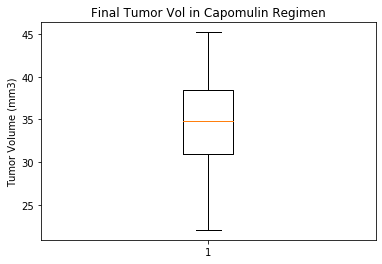

In [121]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Vol in Capomulin Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ramicane_list)
plt.show()

In [122]:
zoniferol_df = timepoint_max_df[timepoint_max_df['Drug Regimen'].isin(['Zoniferol'])]
zoniferol_df.head().reset_index()

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0    510     a401    Zoniferol  Female           8          25         45   
1    647     c264    Zoniferol  Female          11          27         45   
2    667     c302    Zoniferol  Female          10          29         45   
3    689     c559    Zoniferol  Female          19          28         45   
4    850     f545    Zoniferol  Female          20          26         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           66.794156                 4  
1           67.942121                 2  
2           64.575222                 4  
3           61.840058                 4  
4           73.324432                 1

In [123]:
zoniferol_list = zoniferol_df.sort_values(['Tumor Volume (mm3)'],ascending=True).reset_index()
zoniferol_list = zoniferol_list["Tumor Volume (mm3)"]
zoniferol_list

0     60.752704
1     61.840058
2     62.109651
3     62.327966
4     63.488697
5     64.294085
6     64.575222
7     66.794156
8     67.942121
9     68.163195
10    68.401286
11    68.611061
12    70.827796
13    73.324432
Name: Tumor Volume (mm3), dtype: float64

In [124]:
quartiles = zoniferol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.61814874
The upper quartile of temperatures is: 68.34176324
The interquartile range of temperatures is: 5.723614500000004
The the median of temperatures is: 65.68468877999999 
Values below 54.03272699 could be outliers.
Values above 76.92718499000001 could be outliers.


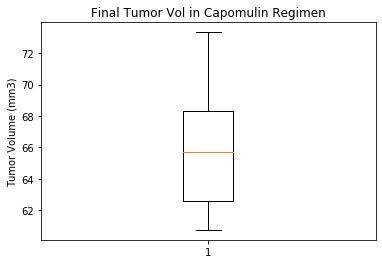

In [125]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Vol in Capomulin Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(zoniferol_list)
plt.show()

In [126]:
ketapril_df = timepoint_max_df[timepoint_max_df['Drug Regimen'].isin(['Ketapril'])]
ketapril_df.head().reset_index()

index Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0    735     c832     Ketapril  Male          18          29         45   
1    884     g497     Ketapril  Male          19          28         45   
2    930     h246     Ketapril  Male          13          30         45   
3   1043     k382     Ketapril  Male          22          29         45   
4   1193     m550     Ketapril  Male          18          28         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           65.415955                 3  
1           69.872251                 2  
2           74.104086                 2  
3           73.715619                 4  
4           69.253503                 4

In [127]:
ketapril_list = ketapril_df.sort_values(['Tumor Volume (mm3)'],ascending=True).reset_index()
ketapril_list = ketapril_list["Tumor Volume (mm3)"]
ketapril_list

0     62.909441
1     65.415955
2     66.268801
3     67.989530
4     69.253503
5     69.872251
6     73.715619
7     73.901399
8     74.104086
9     75.294936
10    78.567014
Name: Tumor Volume (mm3), dtype: float64

In [128]:
quartiles = ketapril_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 67.12916566999999
The upper quartile of temperatures is: 74.002742395
The interquartile range of temperatures is: 6.873576725000007
The the median of temperatures is: 69.87225079 
Values below 56.81880058249998 could be outliers.
Values above 84.31310748250002 could be outliers.


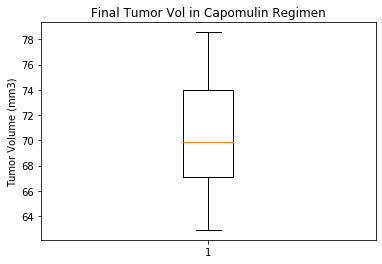

In [129]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Vol in Capomulin Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ketapril_list)
plt.show()

In [132]:
capomulin_df = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       10     s185    Capomulin  Female           3          17          0   
1       11     s185    Capomulin  Female           3          17          5   
2       12     s185    Capomulin  Female           3          17         10   
3       13     s185    Capomulin  Female           3          17         15   
4       14     s185    Capomulin  Female           3          17         20   
..     ...      ...          ...     ...         ...         ...        ...   
225    440     i557    Capomulin  Female           1          24         45   
226   1452     r157    Capomulin    Male          22          25          0   
227   1453     r157    Capomulin    Male          22          25          5   
228   1454     r157    Capomulin    Male          22          25         10   
229   1455     r157    Capomulin    Male          22          25         15   

     Tumor Volume (mm3)  Metastatic Sites  
0             45.000000                 0  
1             43.878496                 0  
2             37.614948                 0  
3             38.177232                 0  
4             36.866876                 0  
..                  ...               ...  
225           47.685963                 1  
226           45.000000                 0  
227           45.597064                 0  
228           46.059608                 0  
229           46.539206                 0  

[230 rows x 9 columns]

In [133]:
capomulin_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "r157"]
capomulin_mouse_df

index Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
226   1452     r157    Capomulin  Male          22          25          0   
227   1453     r157    Capomulin  Male          22          25          5   
228   1454     r157    Capomulin  Male          22          25         10   
229   1455     r157    Capomulin  Male          22          25         15   

     Tumor Volume (mm3)  Metastatic Sites  
226           45.000000                 0  
227           45.597064                 0  
228           46.059608                 0  
229           46.539206                 0

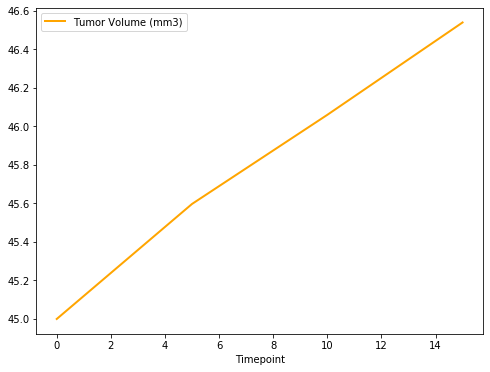

In [138]:
capomulin_mouse_df = capomulin_mouse_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse_df = capomulin_mouse_df.reset_index(drop=True)
capomulin_mouse_df.set_index('Timepoint').plot(figsize=(8,6), linewidth=2.0, color='orange')

In [141]:
capomulin_df.max()

index                      1455
Mouse ID                   y793
Drug Regimen          Capomulin
Sex                        Male
Age_months                   24
Weight (g)                   25
Timepoint                    45
Tumor Volume (mm3)      48.1582
Metastatic Sites              3
dtype: object

In [145]:
capomulin_weight = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

capomulin_weight.head()                             

Mouse ID  Weight (g)  Tumor Volume (mm3)
0     s185          17           45.000000
1     s185          17           43.878496
2     s185          17           37.614948
3     s185          17           38.177232
4     s185          17           36.866876

In [147]:
average_capomulin = pd.DataFrame(capomulin_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_capomulin

Mouse ID  Weight (g)  Tumor Volume (mm3)
0      b128          22           41.963636
1      b742          21           40.083699
2      f966          17           36.505973
3      g288          19           41.990097
4      g316          22           44.613344
5      i557          24           44.805810
6      i738          20           39.141053
7      j119          23           44.465236
8      j246          21           43.216925
9      l509          21           44.434474
10     l897          19           42.507261
11     m601          17           34.847470
12     m957          19           39.049816
13     r157          25           45.798970
14     r554          17           36.509212
15     r944          25           43.367364
16     s185          17           34.559143
17     s710          23           42.803733
18     t565          17           39.328725
19     u364          17           39.887495
20     v923          21           41.581595
21     w150          23           41.384825
22     w914          21           41.352452
23     x401          15           36.182040
24     y793          17           38.506829

In [148]:
average_capomulin = average_capomulin.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_capomulin.head()

Mouse ID  Weight (g)  Average Volume
0     b128          22       41.963636
1     b742          21       40.083699
2     f966          17       36.505973
3     g288          19       41.990097
4     g316          22       44.613344

In [149]:
average_capomulin = average_capomulin.set_index('Mouse ID')

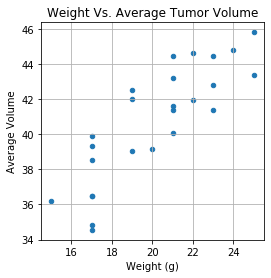

In [157]:
average_capomulin.plot(kind='scatter',x='Weight (g)',y='Average Volume',grid=True,figsize=(4,4),title='Weight Vs. Average Tumor Volume')
plt.show()

In [158]:
from scipy.stats import linregress

In [159]:
mouse_lbs = average_capomulin.iloc[:,0]
average_vol = average_capomulin.iloc[:,1]
correlation = st.pearsonr(mouse_lbs,average_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


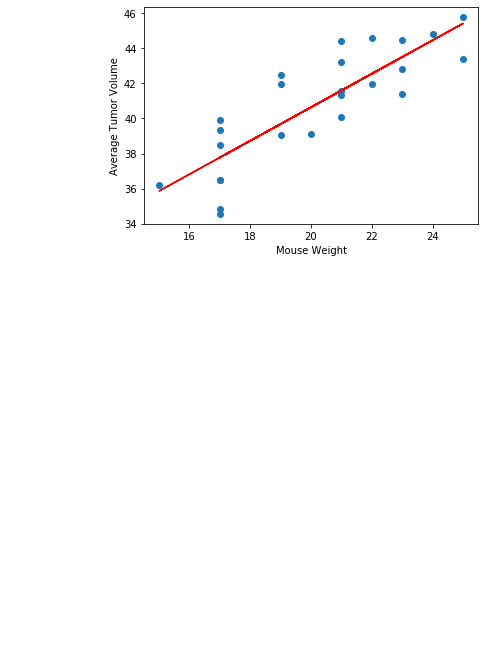

In [163]:
x_values = average_capomulin['Weight (g)']
y_values = average_capomulin['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()